In [1]:
# Importing required packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

# Visualizing the data

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Ploting multiple barplots

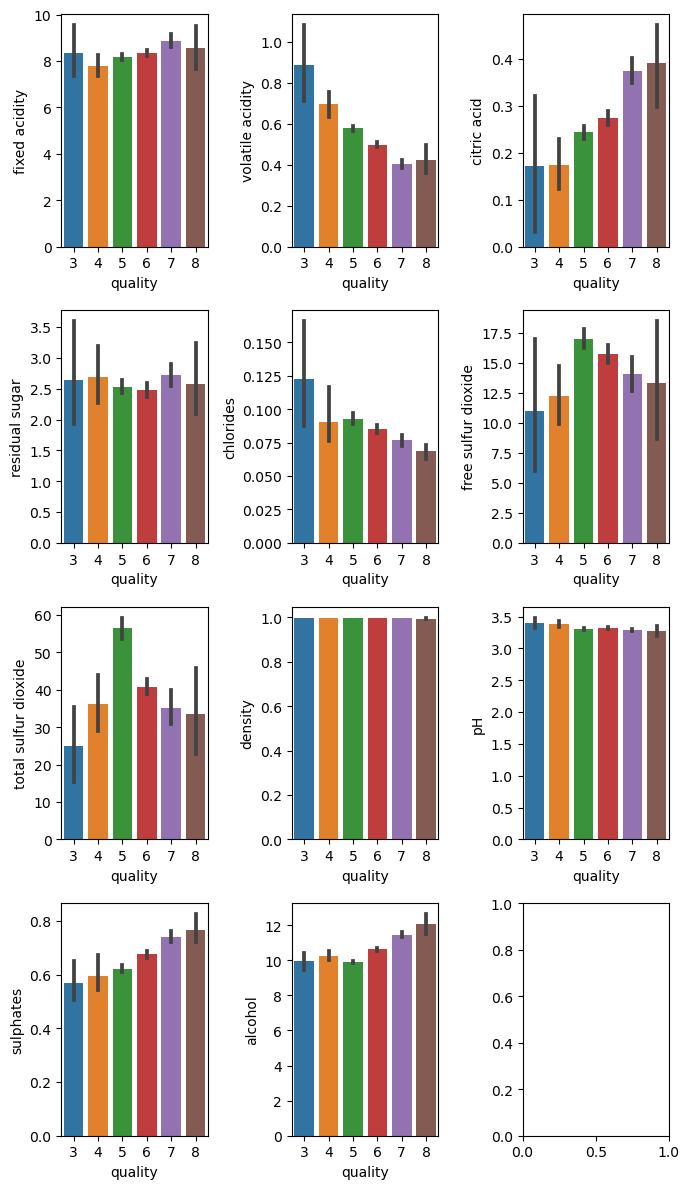

In [5]:
f, axs = plt.subplots(4, 3, figsize=(7, 12))
sns.barplot(x=df["quality"], y=df["fixed acidity"], ax=axs[0][0])
sns.barplot(x=df["quality"], y=df["volatile acidity"], ax=axs[0][1])
sns.barplot(x=df["quality"], y=df["citric acid"], ax=axs[0][2])
sns.barplot(x=df["quality"], y=df["residual sugar"], ax=axs[1][0])
sns.barplot(x=df["quality"], y=df["chlorides"], ax=axs[1][1])
sns.barplot(x=df["quality"], y=df["free sulfur dioxide"], ax=axs[1][2])
sns.barplot(x=df["quality"], y=df["total sulfur dioxide"], ax=axs[2][0])
sns.barplot(x=df["quality"], y=df["density"], ax=axs[2][1])
sns.barplot(x=df["quality"], y=df["pH"], ax=axs[2][2])
sns.barplot(x=df["quality"], y=df["sulphates"], ax=axs[3][0])
sns.barplot(x=df["quality"], y=df["alcohol"], ax=axs[3][1])

f.tight_layout()

#### If one observe density vs quality plot, one can observe that density can be dropped

# Preprocessing Data

#### We will re-label values in 'quality' column as either good (value>6) or bad (value<=6)

In [6]:
print(df['quality'].min(), df['quality'].max())

3 8


In [7]:
bins = (2, 6, 8)
labels = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels)

In [8]:
label_encoder = LabelEncoder()
df['quality'] = label_encoder.fit_transform(df['quality'])

In [9]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

#### Creating training and testing sets after droping 'quality' column

In [10]:
X = df.drop(['quality', 'density'], axis=1)
y = df['quality']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Scaling the data

In [12]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

### Trying RandomForestClassifier

In [13]:
rf_clf = RandomForestClassifier(n_estimators=200)
rf_clf.fit(X_train, y_train)
y_pred_rf_clf = rf_clf.predict(X_test)
print(classification_report(y_test, y_pred_rf_clf))
print("Accuracy is: ", accuracy_score(y_test, y_pred_rf_clf))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       273
           1       0.76      0.53      0.62        47

    accuracy                           0.91       320
   macro avg       0.84      0.75      0.79       320
weighted avg       0.90      0.91      0.90       320

Accuracy is:  0.90625


In [14]:
rf_clf_eval = cross_val_score(estimator=rf_clf, X = X_train, y = y_train, cv=10)
rf_clf_eval.mean()

0.9132320374015748

### Trying SGDClassifier

In [15]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
y_pred_sgd_clf = sgd_clf.predict(X_test)
print(classification_report(y_test, y_pred_sgd_clf))
print("Accuracy is: ", accuracy_score(y_test, y_pred_sgd_clf))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       273
           1       0.42      0.64      0.50        47

    accuracy                           0.82       320
   macro avg       0.67      0.74      0.70       320
weighted avg       0.86      0.82      0.83       320

Accuracy is:  0.815625


In [16]:
sgd_clf_eval = cross_val_score(estimator=sgd_clf, X = X_train, y = y_train, cv=10)
sgd_clf_eval.mean()

0.8217273622047244

### Trying SVC

In [17]:
svc_clf = SVC(random_state=42)
svc_clf.fit(X_train, y_train)
y_pred_svc_clf = svc_clf.predict(X_test)
print(classification_report(y_test, y_pred_svc_clf))
print("Accuracy is: ", accuracy_score(y_test, y_pred_svc_clf))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       273
           1       1.00      0.02      0.04        47

    accuracy                           0.86       320
   macro avg       0.93      0.51      0.48       320
weighted avg       0.88      0.86      0.79       320

Accuracy is:  0.85625


#### Using GridSearchCV to get best params

In [18]:
param_svc = {
    'C' : [0.1, 0.8, 0.9, 1, 1.1, 1.2],
    'kernel' : ['poly', 'rbf', 'linear']
}
svc_clf2 = GridSearchCV(svc_clf, param_grid=param_svc, scoring='accuracy', cv=10)

In [19]:
svc_clf2.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2],
                         'kernel': ['poly', 'rbf', 'linear']},
             scoring='accuracy')

In [20]:
svc_clf2.best_params_

{'C': 0.1, 'kernel': 'poly'}

In [22]:
svc_final = SVC(C=0.1, kernel='poly')
svc_final.fit(X_train, y_train)
y_pred_svc_final = svc_final.predict(X_test)
print("Accuracy is: ", accuracy_score(y_test, y_pred_svc_final))

Accuracy is:  0.853125


##### Thus RandomForestClassifier gives the highest accuracy